# Lab 6
We are going to explore how the confidence intervals work based on the background distribution we create using poisson distribution and by the signal data created using uniform distribution.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of th eplot to something useful
plt.rcParams["figure.figsize"] = (15,10)

First, the background data is created using poisson disctributionwith mean of 100.

In [3]:
# Creating a background data using a poisson distribution with a million data
mu = 100 
bkg = np.random.poisson(100, 1000000)

In [35]:
# Finding the 5 sigma signal
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob,mu)
print('The value of a five sigma signal is  = {:.1f}'.format(sigma))

The value of a five sigma signal is  = 154.0


If the signal free background distribution have a poisson distribution with mu value of 100, then we should see at least a observed value of 154 to be sure that it a signal and not a background that we have observed.

Now, a sginal strength equivalent to 8 sigma value of the background distribution is injected to the background data.

In [4]:
prob = stats.norm.cdf(8)
sigma = stats.poisson.ppf(prob,mu)
print('The 8 sigma signal value is  = {:.1f}'.format(sigma))

The 8 sigma signal value is  = 190.00


A 8 sigma signal value is 190. We are injecting this value to the background data.

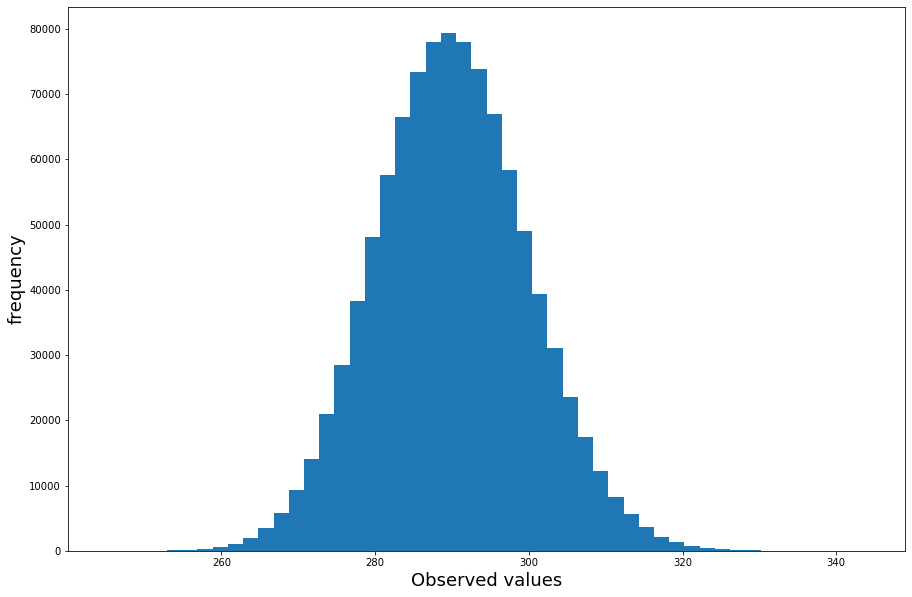

In [5]:
injected_signal = sigma
data = bkg + injected_signal

plt.hist(data, bins = 50);
plt.xlabel('Observed values', fontsize=18)
plt.ylabel('frequency', fontsize=18);

Since the mu value is very high, mu = 100, the distribution takes on a shape of gaussican distribution. This is the unique property of poisson distribution that once the average number gets higher poisson distribution tends to gaussian distribution. With this distribution, it is more likely to observe a value in a range of 280 to 300. This is approximately where the peak of the distribution is and the peak has the highest frequency. Our observed signal value is biased since the observed value is likely to be stronger than the true injected siganl value. Our injected signal value is 190 but this value is very left tail of the observed value distribution. 



Now, instead of injecting one single signal strengh to the background data, we are injecting singal strength starting at zero and extending to 8 sigma value equivalent strength.

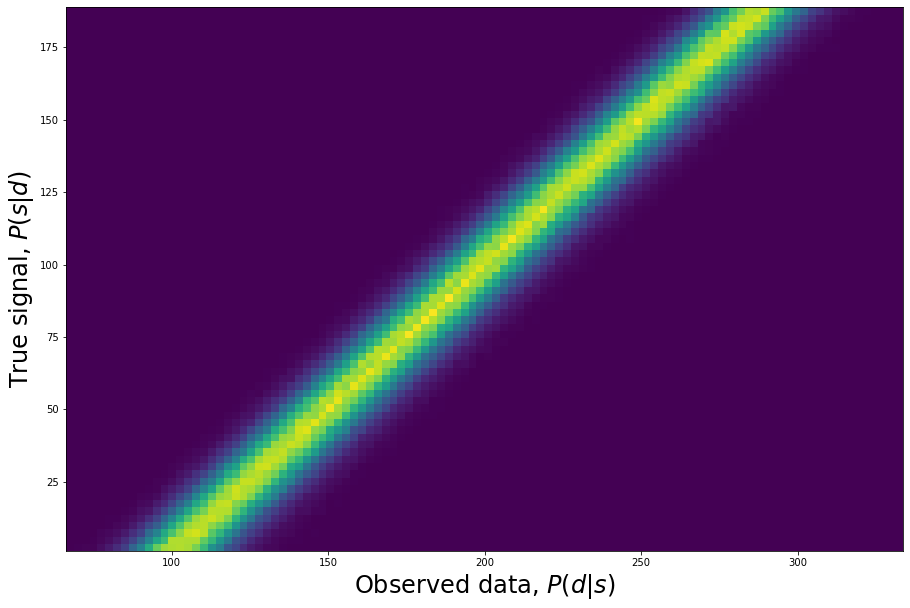

In [5]:
signal = np.zeros(0,dtype=int) 
data = np.zeros(0,dtype=int) 

signal = np.random.uniform(0,190, 1000000)
data = bkg + signal

signaledges = np.linspace(0,190,76) # 2.5 interval
dataedges = np.linspace(65,335,108) # 2.5 interval

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

If you look at the verticle stripe of this 2D histogram, it shows what the true signal distribution looks like for that specific value of observed data. If you look at the horizontal stripe of this 2D histogram, it shows what the distribution of observed data looks like with a specific true signal value. The darker color indicates less frequency and the frequency increases as the color gets brighter.

The plot below is a histogram of a horizontal stripe at a true signal value of 190.

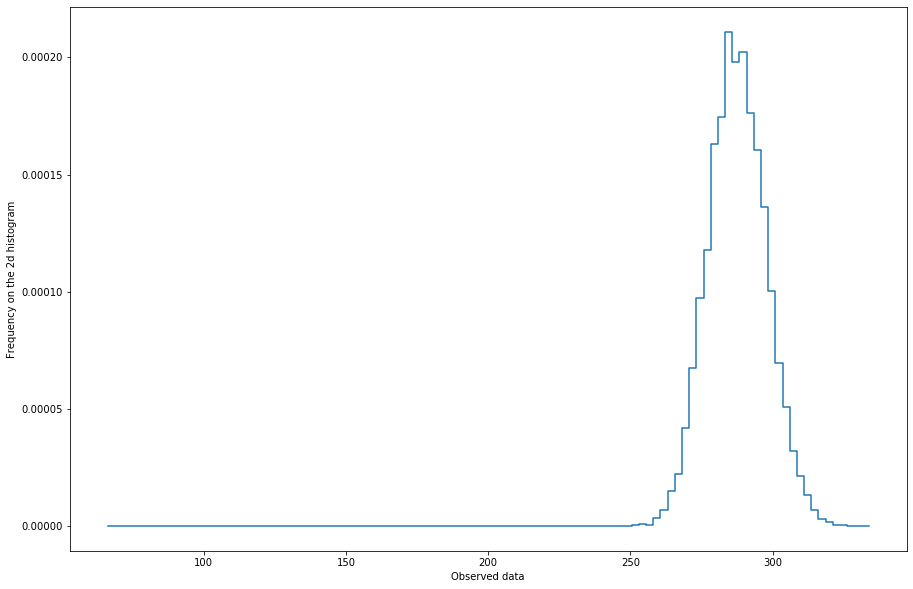

In [7]:
horizontal = Psd[:,74]
plt.step(datacenters, horizontal)
plt.xlabel("Observed data")
plt.ylabel("Frequency on the 2d histogram");

The plot shows the frequency of the possible observable value if the signal value happens to be 190. Since the 2D histogram shows the frequency of data for a range of observable values and for a range of signal values.  If I want to find a range of all possible observable data values for a specific signal value, I need to cut a horizontal stripe off the 2D histogram. This is the plot of that single horizontal stripe. From this plot, we can see that any observable data values between 280 to 300 has the highest frequency. The peak of the distribuion is to the right of diagram, it shows that it is very likely for the observed value to be stronger than a signal value of 190 so the observed signal is biased. 

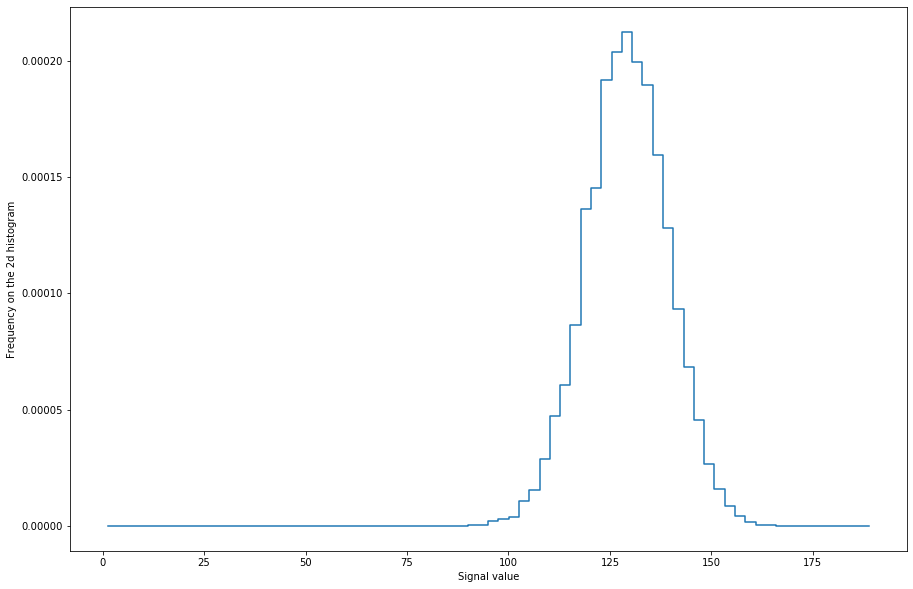

In [8]:
vertical = Psd[65,:]
plt.step(signalcenters, vertical)
plt.xlabel("Signal value")
plt.ylabel("Frequency on the 2d histogram");


The plot above shows the frequency of the possible signal value if the observed value happens to be 200. Since the 2D histogram shows the frequency of data for a range of observable values and for a range of signal values.  If I want to find a range of all possible signal values for a specific observed value, I need to cut a verticle stripe off the 2D histogram. This is the plot of that single verticle stripe. From this plot, we can see that any observable data values between 85 to 105 has the highest frequency. The peak of the distribuion is around a signal value of 90.

For the observed signal of 200, we can calculate the 1 sigma uncertainty of the true signal value using the 1D histogram ploted above. It will tell us by how much the most probable true signal value can vary by 68% probability.

In [9]:
# finding the 1 sigma uncertainty in the signal strength. This is the upper limit
prob_sigma_plus = stats.norm.cdf(1)

den = 0

for i in range(0,vertical.size):
    den = den + vertical[i]

num = 0
for i in range(0,75):
    num = num + vertical[i]
    prob = num/den
    if prob >= prob_sigma_plus:
        index1 = i
        break

# finding the 1 sigma uncertainty in the signal strength. This is the upper limit
prob_sigma_minus = 1-stats.norm.cdf(1)

num = 0
for i in range(0,75):
    num = num + vertical[i]
    prob2 = num/den
    if prob2 >= prob_sigma_minus:
        index2 = i
        break

        
print('The upper 1 sigma uncertainty in signal strength is = {:.1f}'.format(signalcenters[index1]))
print('The lower 1 sigma uncertainty in signal strength is = {:.1f}'.format(signalcenters[index2]))

The upper 1 sigma uncertainty in signal strength is = 140.6
The lower 1 sigma uncertainty in signal strength is = 120.3


e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?


The 1 sigma uncertainty values represent the confidence interval of where the true signal mean will be found within one sigma. The upper confidence interval is 140.6 and the lower confidence interval is 120.3. With 1 sigma uncertainty we can be sure that the true signal will like within these intervals. It is pretty symmetric since the the distribution, except for the long tail, resembles gaussian distribution because we created the background data using a possion with a high mean value.